In [16]:
from make_data import make_data 
from DWT import discrete_wavelet_denoise, log_return 
from CWT import CWT
import numpy as np 
import os
from tqdm import tqdm

In [17]:
import yfinance as yf
SP500 = yf.download('SPY', keepna = True )

[*********************100%***********************]  1 of 1 completed


In [18]:
data = make_data (SP500)
signal = data['Adj Close'].to_numpy()

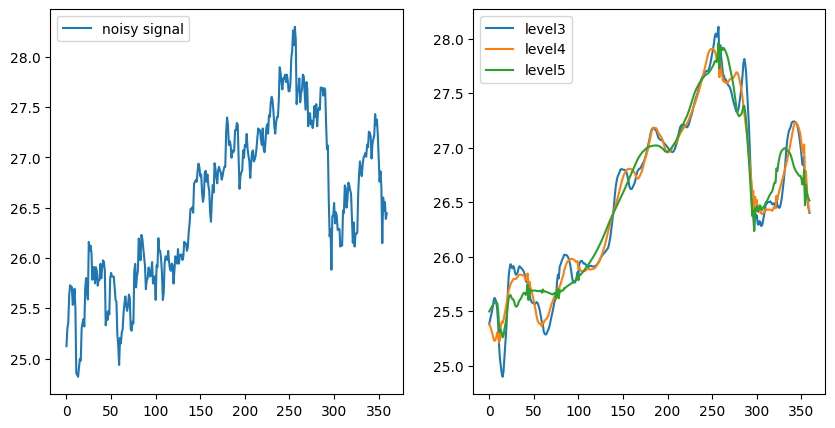

In [33]:
k = 360
fig , ax = plt.subplots(1,2,figsize = (10,5))
ax[0].plot(signal[:k], label = 'noisy signal')
ax[0].legend()
for l in [3,4,5]:
    
    ax[1].plot(discrete_wavelet_denoise(signal[:k] , level = l), label = 'level'+str(l))
plt.legend()

In [4]:


def generate_image(sample ,path, level_discrete_wavelet_transform,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs ) : 
    """
    generates an image from a portion of the signal
    
    Parameters 
    ----------
    sample : array
        the portion of the signal to be analyzed
    path : string
        path to save the image
    
    level_discrete_wavelet_transform :int
        level of discrete wavelet transform
        
    discrete_wavelet : string
        Type of the DWT (adapted to the package pywt)
    
    continous_wavelet : string
        Type of the CWT (adapted to the package pywt)
        
    kwargs : dict
        Parameters of the continuous wavelet
        
    """
    denoised_sample = discrete_wavelet_denoise (sample , wavelet = discrete_wavelet, level = level_discrete_wavelet_transform)
    log_ret = log_return(denoised_sample)
    CWT (log_ret,wavelet = continuous_wavelet, show = False ,path = path, **kwargs  )



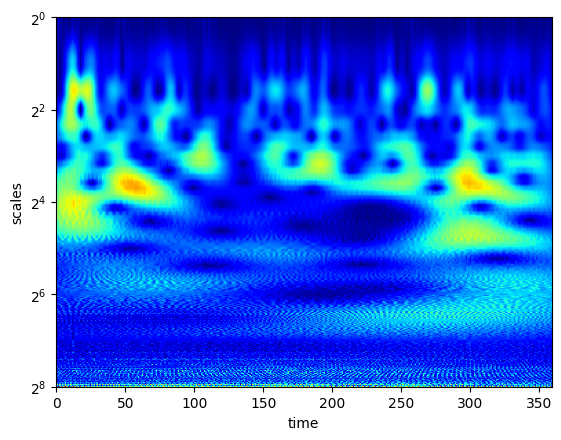

In [7]:
## Test 
window_size = 360
level_discrete_wavelet_transform = 1
sample = signal[:window_size]
kwargs = {'b' : 2., 'c' : 1. }
path = os.path.join('k', 'scalo')
generate_image(sample ,path, level_discrete_wavelet_transform,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs ) 

In [13]:
def generate_labels(signal, window_size, method ='mean' ):
    
    if (method == 'mean'):
        moving_average = np.convolve(signal, np.ones(window_size)/window_size, mode='valid')[:-1] ## exclude last sample cuz no label
        next_day = signal[window_size : ]
        labels = 1*(next_day>moving_average)
    
    return labels
        

In [53]:
def generate_NN_dataset(
    signal ,
    window_size,
    method_labels = 'mean',
    jump = 1,
    level_discrete_wavelet_transform = 2,
    discrete_wavelet = 'db4',
    continuous_wavelet = 'cmor', 
    **kwargs
    ) :
    
    """
    generates two folders of images according to the label
    
    Parameters 
    ----------
    signal : array
        the whole signal to be analyzed (one time series)
        
    window_size : int
        The length of the generate photo
        
    method_labels : string
        default : 'mean' 
        how to generate the labels : 'mean' means the labels are generated 
        as follows : ref the paper https://arxiv.org/pdf/2008.06042.pdf
    
    level_discrete_wavelet_transform :int
        level of discrete wavelet transform
        
    discrete_wavelet : string
        Type of the DWT (adapted to the package pywt)
    
    continous_wavelet : string
        Type of the CWT (adapted to the package pywt)
        
    kwargs : dict
        Parameters of the continuous wavelet
        
    
    Returns
    --------
    images in folders 0/ and 1/ according to the label of the image
    """
    print ('hi')
    # create folder per label
    os.makedirs(os.path.join(str(window_size),'0'), exist_ok=True)
    os.makedirs(os.path.join(str(window_size),'1'), exist_ok=True)
    
    #labels
    labels =  generate_labels(signal, window_size, method =method_labels )
    
    #create images
    for i in tqdm(range(0,signal.shape[0] - window_size + 1, jump)):
  
        sample = signal[i:i+window_size]
      
        path = os.path.join(str(window_size), os.path.join(str(labels[i]), str(i)))
        
        generate_image(
            sample ,
            path,
            level_discrete_wavelet_transform,
            discrete_wavelet,
            continuous_wavelet,
             **kwargs ) 

In [70]:
def f ():
    print ('ok')

In [74]:
import multiprocessing as mp 

procs = mp.cpu_count()

pool = mp.Pool()


for i in range(procs):
    pool.apply_async(f,())
        

In [75]:
n = signal.shape[0]
procs = mp.cpu_count()
pool = mp.Pool(procs)
args = ()
for i in range(procs):
        if (i == procs - 1):
            pool.apply_async(
                generate_NN_dataset,
                args = (
                signal[i*n//threads:] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
            ),
                kwds = kwargs
        )
                
        else:
            print('i')
            pool.apply_async(
                generate_NN_dataset,
                args = (
                signal[i*n//threads:(i+1)*n//threads] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
            ),
                kwds = kwargs
        )
        

i
i
i


In [32]:




if __name__ == '__main__':
    jobs = []
    n = signal.shape[0]
    procs = mp.cpu_count()
    
    

    for i in range(0, procs):
    
        out_list = list()
    with multiprocessing.Pool(PROCESSES) as po
        if (i == procs - 1):
            thread =multiprocessing.Process(
                target=generate_NN_dataset,
                args = (
                signal[i*n//threads:] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
                kwargs['b'],
                kwargs['c']
            )
                
            thread.daemon = True 
            thread.start()
        )
                
        else:
            print('i')
            thread = multiprocessing.Process(
           
                target=generate_NN_dataset,
                args = (
                signal[i*n//threads:(i+1)*n//threads] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
                kwargs['b'],
                kwargs['c']
            )
            thread.daemon = True 
            thread.start()

        )
        
        jobs.append(thread)

#     # Start the threads (i.e. calculate the random number lists)
#     for j in jobs:
#         print('start')
#         j.start()

    # Ensure all of the threads have finished
# for j in jobs:
#     j.join()

# print "List processing complete."

i
start
start


In [44]:
!python pipeline.py

Figure(640x480)
check the example.png created by this file
ok
i


In [28]:
window_size = 360
level_discrete_wavelet_transform = 1
kwargs = {'b' : 2., 'c' : 1. }
# generate_NN_dataset(signal , window_size,method_labels = 'mean',level_discrete_wavelet_transform = 2,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs )

### Test SSA


In [34]:
from SSA import *

In [35]:
window_size = 360
sample = signal[:window_size]


number of eigenvalues taken is 3


array([25.15085711, 25.25288932, 25.40340275, 25.59863983, 25.72463273,
       25.74073017, 25.66320961, 25.55889754, 25.60674392, 25.66501135,
       25.42366273, 24.97092309, 24.78179497, 24.82585773, 24.91204666,
       24.96103862, 25.04990337, 25.25469369, 25.36326917, 25.35359681,
       25.4018251 , 25.65830775, 25.75650301, 25.66119726, 25.70495565,
       26.0094054 , 26.14720862, 26.1230045 , 25.9905856 , 25.86912855,
       25.86851742, 25.86612673, 25.82869163, 25.86342714, 25.85335219,
       25.76320536, 25.75267521, 25.81849617, 25.87572292, 25.85074872,
       25.8870996 , 25.98160094, 25.98184893, 25.7748802 , 25.45722657,
       25.3856741 , 25.40321171, 25.43590427, 25.51601901, 25.74054383,
       25.84969156, 25.83765572, 25.81738209, 25.79326976, 25.71320652,
       25.61557416, 25.51007389, 25.28429444, 25.08593813, 25.01447585,
       25.1279275 , 25.19089594, 25.24247413, 25.31016213, 25.44569113,
       25.55903175, 25.59878261, 25.53198159, 25.47940636, 25.54

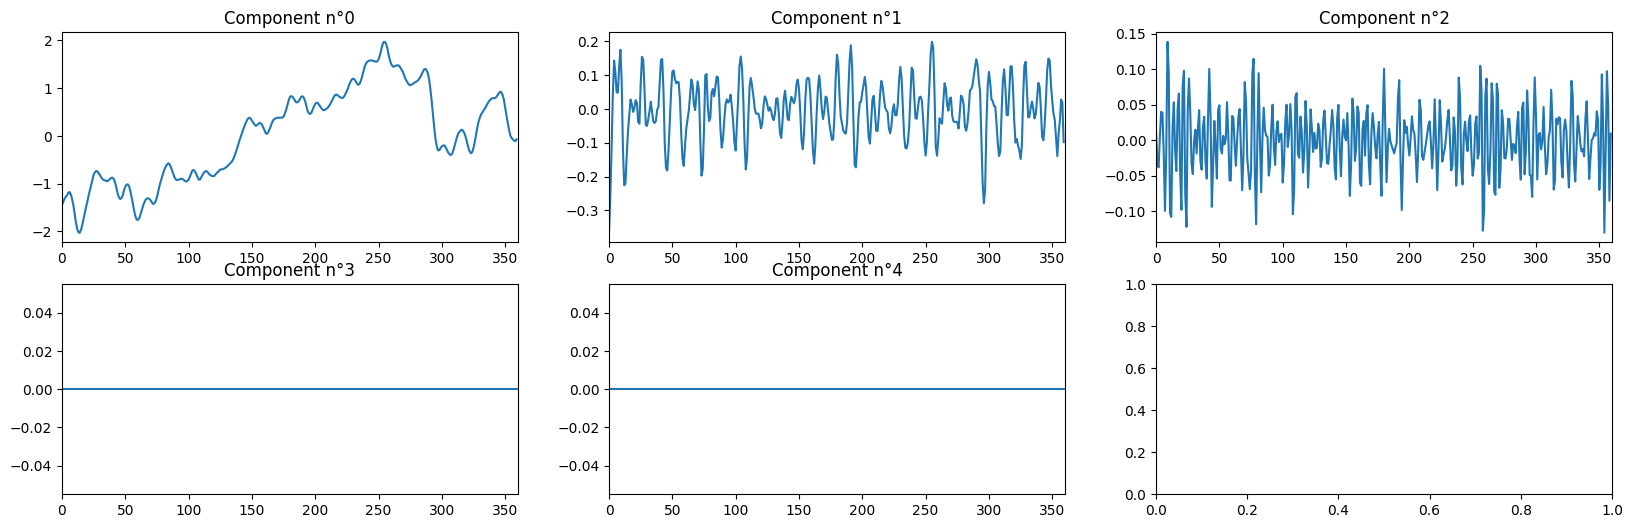

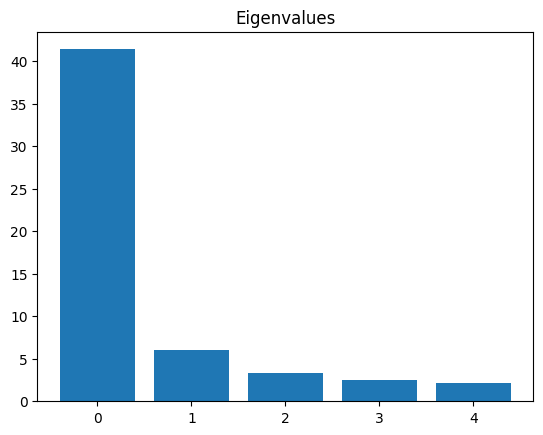

In [36]:
# plt.plot(sample)
SSA (sample , window_SSA = 5, thresh = 0.9, show = True)

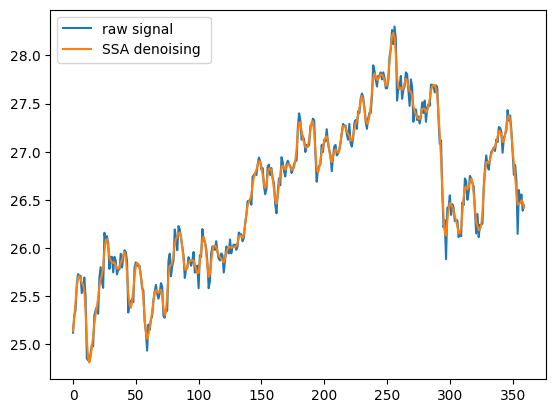

In [40]:
plt.plot(sample, label = 'raw signal')
plt.plot(SSA (sample , window_SSA = 5, thresh = 0.8, show = False), label = 'SSA denoising ')
plt.legend()

### Feature selection test 

In [18]:
import minepy
from pipeline import generate_labels

In [12]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA7,SMA14,SMA30,...,ForceIndex14,ForceIndex30,ForceIndex60,ForceIndex90,EMV5,EMV7,EMV14,EMV30,EMV60,EMV90
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218220,1003200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397587,480500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451401,201300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720438,529400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828051,531500,25.523139,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10,390.989990,393.160004,384.320007,385.910004,385.910004,189105300,395.826001,397.304286,397.466431,404.100001,...,-4.037399e+09,-3.562743e+09,-2.121081e+09,-2.518422e+08,-15.675859,-5.332561,-5.824101,-0.690141,1.374214,1.298024
2023-03-13,381.809998,390.390015,380.649994,385.359985,385.359985,157790000,392.003998,395.525713,396.485716,403.422667,...,-2.166458e+09,-3.206294e+09,-2.330971e+09,1.444370e+08,-23.422117,-8.678999,-5.264157,-2.118102,-0.279429,0.996661
2023-03-14,390.500000,393.450012,387.049988,391.730011,391.730011,149752400,390.696002,393.745714,395.999287,403.127335,...,-1.019813e+09,-1.326804e+09,-8.752024e+08,1.342932e+09,-13.425315,-11.148697,-2.973624,-0.769957,0.606475,1.220345


In [50]:
max_MIC

[0.8498943201482787,
 0.8300624604899,
 0.8070692495230575,
 0.7491762839355419,
 0.5556829722836665]

In [53]:
max_MIC = []
for w in [1, 5, 8 ,10,14,30,60]:
    
    signal = data['Adj Close'].to_numpy()
    window_size = w 
    labels = generate_labels(signal , window_size )
    max_ = np.max(minepy.cstats(data.iloc[window_size:,:].to_numpy().T ,  labels.reshape(1,-1))[0].squeeze())
    max_MIC.append(max_)


(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9')])

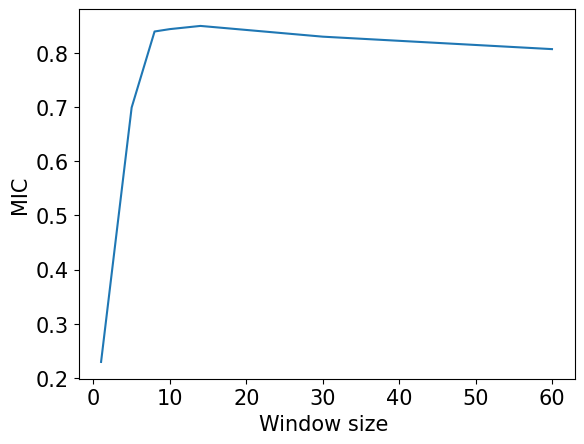

In [54]:

plt.plot( [1, 5, 8 ,10,14,30,60], max_MIC)
plt.ylabel('MIC', fontsize = 15)
plt.xlabel('Window size ', fontsize = 15)
plt.xticks (fontsize = 15)
plt.yticks (fontsize = 15)

In [58]:
second_max_MIC = []
for w in [1, 5, 8 ,10,14,30,60]:
    
    signal = data['Adj Close'].to_numpy()
    window_size = w 
    labels = generate_labels(signal , window_size )
    max_ = np.sort(minepy.cstats(data.iloc[window_size:,:].to_numpy().T ,  labels.reshape(1,-1))[0].squeeze())[-2]
    second_max_MIC.append(max_)


(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9')])

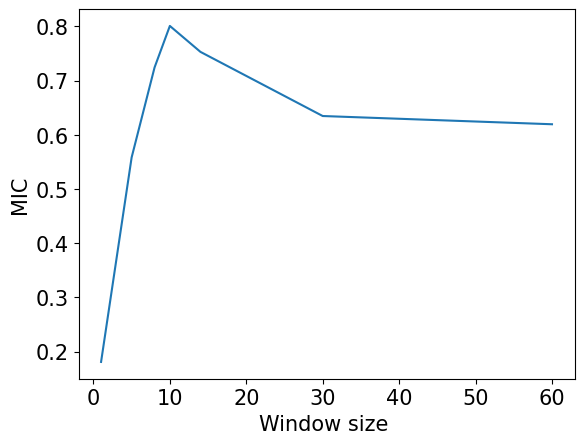

In [59]:

plt.plot( [1, 5, 8 ,10,14,30,60], second_max_MIC)
plt.ylabel('MIC', fontsize = 15)
plt.xlabel('Window size ', fontsize = 15)
plt.xticks (fontsize = 15)
plt.yticks (fontsize = 15)

In [61]:
third_max_MIC = []
for w in [1, 5, 8 ,10,14,30,60]:
    
    signal = data['Adj Close'].to_numpy()
    window_size = w 
    labels = generate_labels(signal , window_size )
    max_ = np.sort(minepy.cstats(data.iloc[window_size:,:].to_numpy().T ,  labels.reshape(1,-1))[0].squeeze())[-3]
    third_max_MIC.append(max_)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

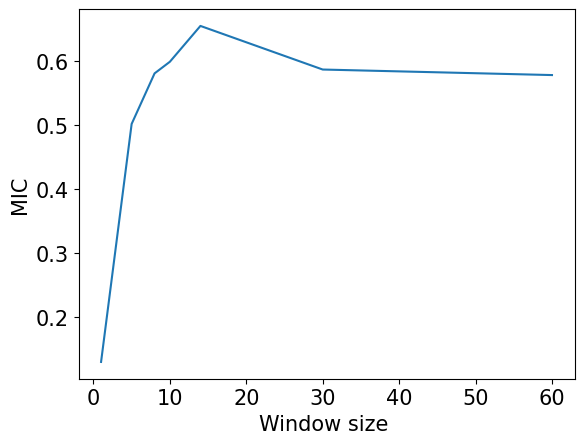

In [62]:

plt.plot( [1, 5, 8 ,10,14,30,60], third_max_MIC)
plt.ylabel('MIC', fontsize = 15)
plt.xlabel('Window size ', fontsize = 15)
plt.xticks (fontsize = 15)
plt.yticks (fontsize = 15)

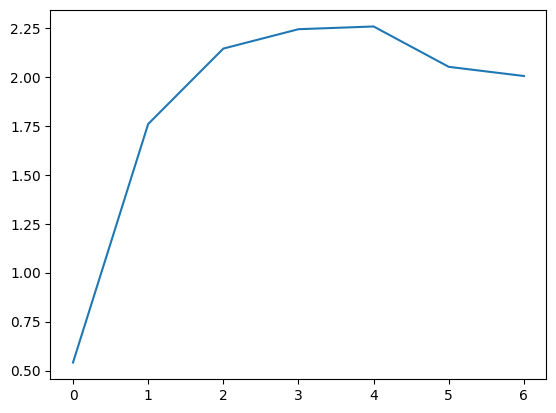

In [63]:
plt.plot(np.array(max_MIC) + np.array(second_max_MIC) +np.array(third_max_MIC))

In [46]:
mics = minepy.cstats(data.iloc[window_size:,:].to_numpy().T ,  labels.reshape(1,-1))[0].squeeze()

In [47]:
mics

array([0.12726331, 0.13993328, 0.14135143, 0.15042412, 0.17040841,
       0.14595532, 0.14730736, 0.13933624, 0.11894467, 0.16025402,
       0.22981612, 0.28996986, 0.16523078, 0.15754036, 0.13373791,
       0.13241882, 0.18224436, 0.22637253, 0.18189254, 0.14859876,
       0.45328881, 0.58636052, 0.83006246, 0.63458676, 0.41559828,
       0.31927114, 0.24224189, 0.29998905, 0.43514261, 0.36586764,
       0.20570222, 0.16869054, 0.1017176 , 0.10099956, 0.10532683,
       0.13234044, 0.19253914, 0.22094079, 0.2705546 , 0.33557304,
       0.54757234, 0.43266846, 0.21730613, 0.16686778, 0.2461424 ,
       0.29524879, 0.47628147, 0.3883375 , 0.20913993, 0.17948255])

In [38]:
mics[4]

0.28847651032737465

In [35]:
data.iloc[:,mics.argsort()[-10:]]

,EWMA_90,SMA60,SMA90,EWMA_30,ForceIndex90,UpperBand,EWMA_60,LowerBand,RSI60,RSI90
Date,,,,,,,,,,
1993-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-10,396.244546,396.789099,394.915870,399.740098,-2.518422e+08,419.401007,397.905218,388.798995,47.858749,48.477522
2023-03-13,396.005324,396.542889,394.926041,398.812349,1.444370e+08,420.165361,397.493899,386.679974,47.744946,48.403934
2023-03-14,395.911361,396.445483,395.025682,398.355424,1.342932e+09,420.381546,397.304919,385.873124,49.168544,49.305178


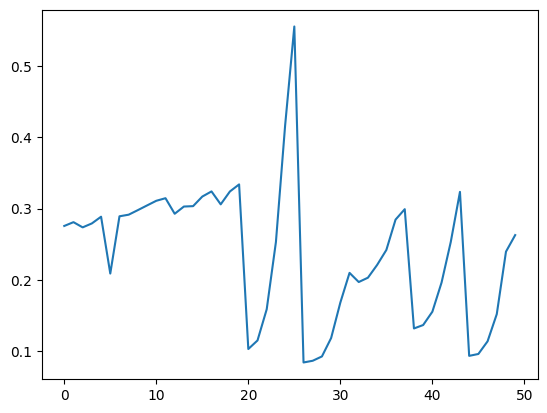

In [27]:
plt.plot(mics.flatten())

## Test spectrogram 

In [4]:
from Short_time_fourier import *

In [5]:
from DWT import discrete_wavelet_denoise, log_return

In [6]:
sample_denoised = discrete_wavelet_denoise (signal[:360] , wavelet = 'db4', level = 1)
log_ret = log_return(sample_denoised)

array([[1.42265607e-06, 1.80939476e-06],
       [8.67984580e-06, 5.61856469e-05],
       [1.36410323e-06, 5.52080591e-05],
       [8.52224088e-05, 3.11987007e-07],
       [1.33300360e-05, 2.21162398e-05],
       [2.76621496e-05, 5.99154754e-05],
       [7.89665302e-05, 6.25826226e-05],
       [3.41292079e-05, 1.05032642e-04],
       [3.02953586e-06, 4.17439133e-05],
       [6.99993820e-05, 1.69735711e-05],
       [3.68898591e-06, 1.13827623e-05],
       [6.29842866e-05, 4.86998943e-05],
       [2.15443241e-04, 1.71462027e-04],
       [6.02416896e-05, 6.56803913e-05],
       [1.30724701e-04, 2.10100976e-04],
       [6.75794709e-05, 2.62268003e-04],
       [8.83123290e-06, 8.01589213e-05],
       [1.82967271e-04, 3.52919981e-05],
       [1.64273125e-05, 1.08630976e-04],
       [3.61918388e-05, 6.36188874e-05],
       [1.49776853e-04, 1.16463400e-04],
       [1.12549043e-04, 3.16937776e-05],
       [2.84266911e-05, 8.22151079e-05],
       [9.91579262e-05, 7.29528257e-05],
       [3.158461

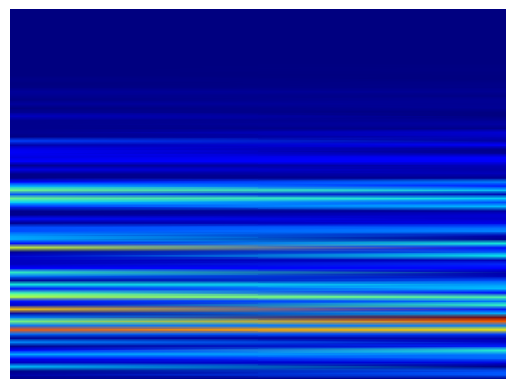

In [9]:
STFourier (log_ret, path ='spectrogram.png',show = True  )

## New dataset

In [15]:
import pandas as pd 
consommation = pd.read_csv('consommation-quotidienne-brute.csv', sep = ';')